In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('loan-train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.shape

(614, 13)

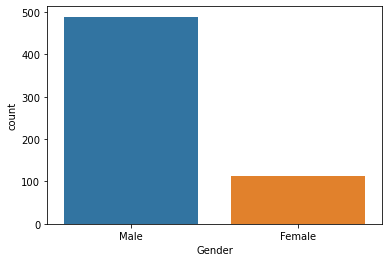

In [8]:
sns.countplot(x = df.Gender , data=df)
plt.show()

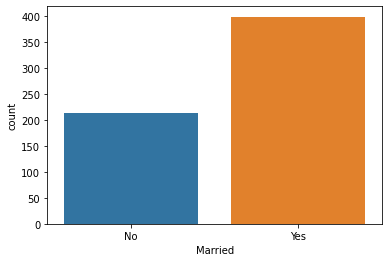

In [10]:
sns.countplot(x = df.Married , data = df)
plt.show()

<AxesSubplot:xlabel='Education', ylabel='count'>

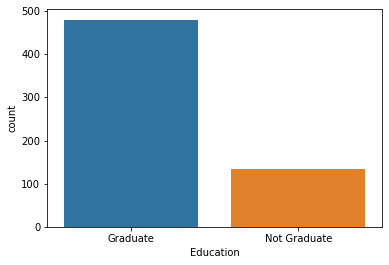

In [11]:
sns.countplot(x= df.Education,data = df)

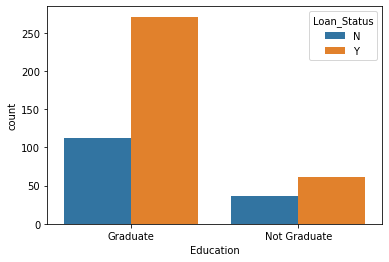

In [89]:
sns.countplot(x= df.Education,data = df,hue=df.Loan_Status)
plt.show()

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

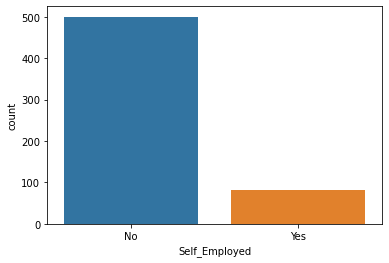

In [12]:
sns.countplot(x= df.Self_Employed,data = df)


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

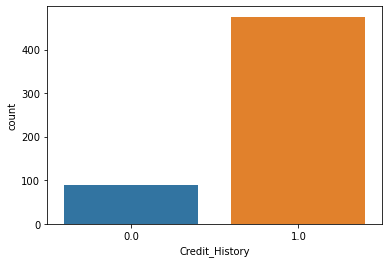

In [13]:
sns.countplot(x="Credit_History", data=df)


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

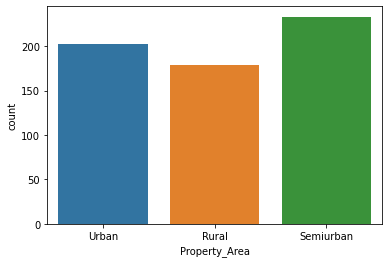

In [17]:
sns.countplot(x= 'Property_Area',data = df )

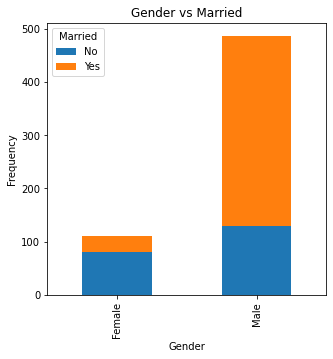

In [28]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5))
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

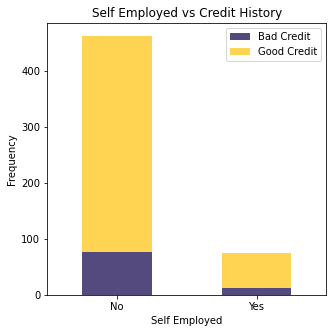

In [29]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

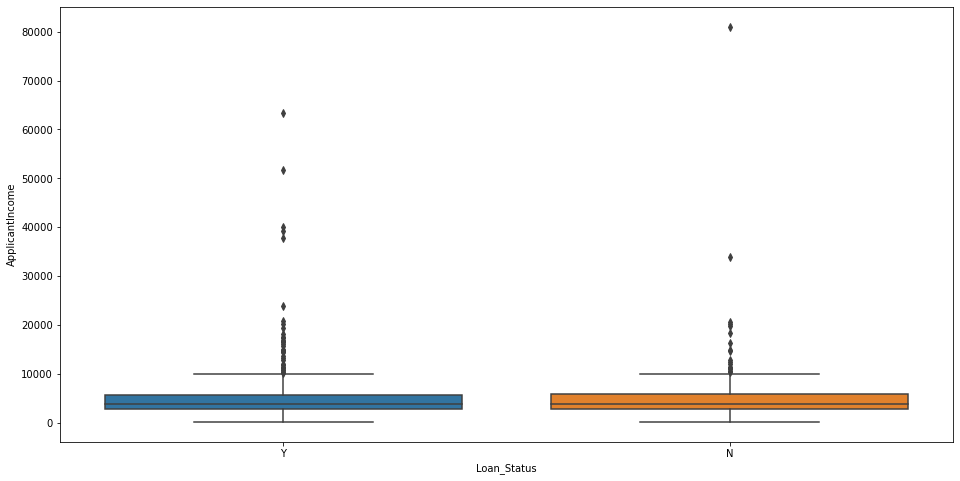

In [32]:
plt.figure(figsize=[16,8])

sns.boxplot (x= df.Loan_Status,y=df.ApplicantIncome,data=df)

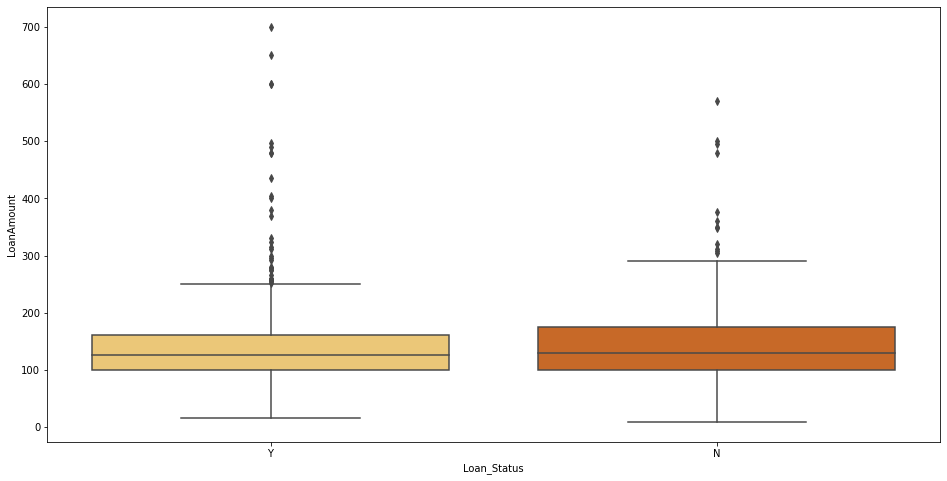

In [33]:
plt.figure(figsize=[16,8])
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");

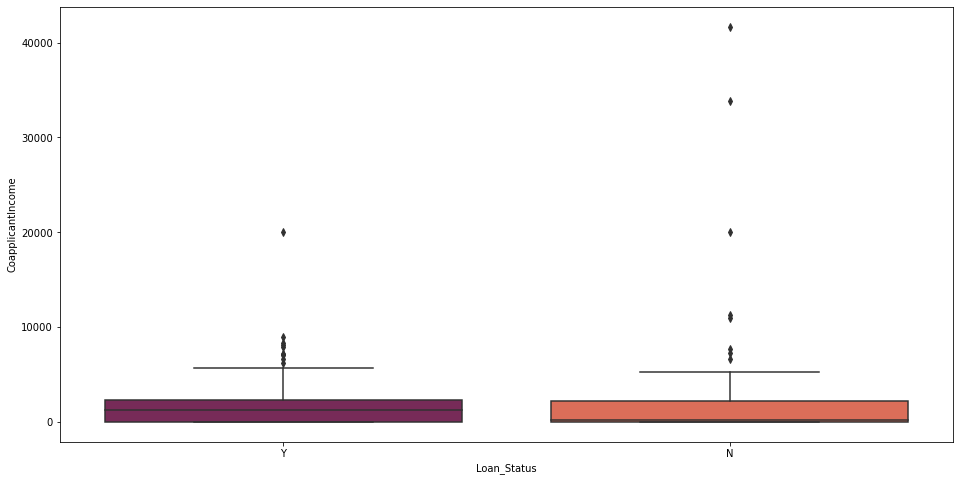

In [35]:
plt.figure(figsize=[16,8])
sns.boxplot(x="Loan_Status",y="CoapplicantIncome" ,data=df, palette="rocket");

<AxesSubplot:>

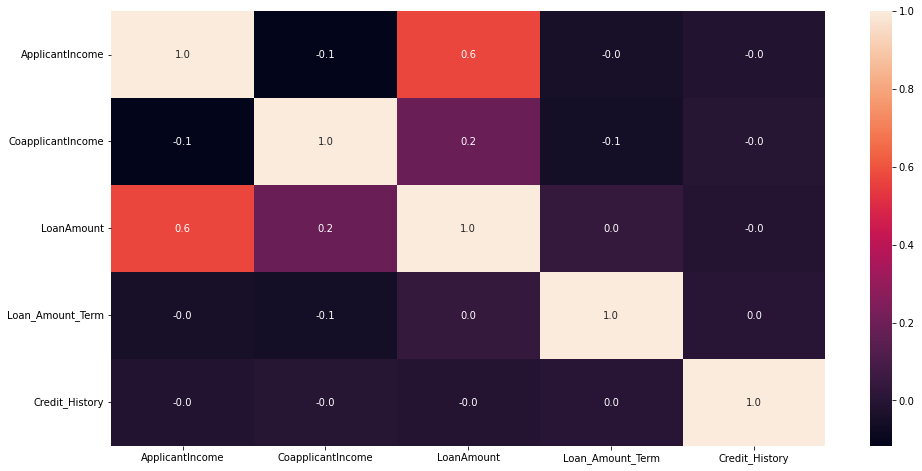

In [38]:
plt.figure(figsize=[16,8])
sns.heatmap(df.corr(),annot=True,fmt='0.1f')

In [78]:
df.replace(to_replace='3+',value=4,inplace=True)

In [80]:
df.Dependents.value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [82]:
df.LoanAmount.fillna(value=df.LoanAmount.mean())

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64

In [86]:
df.dropna(inplace=True)

In [87]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [93]:
df.drop(['Loan_ID'],axis = 1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [95]:
df = pd.get_dummies(df)

df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

In [96]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Dependents_4,Dependents_0,Dependents_1,Dependents_2,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,1,1
3,2583,2358.0,120.0,360.0,1.0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,1,1


In [100]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [102]:
x = df.drop(['Loan_Status'],axis = 1)
y = df['Loan_Status']

In [103]:
x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [107]:
model1 = SVC()

In [108]:
model1.fit(x_train,y_train)

SVC()

In [109]:
model1.score(x_train,y_train)

0.7083333333333334

In [110]:
model1.score(x_test,y_test)

0.6354166666666666

In [111]:
pre = model1.predict(x_test)

In [134]:
from sklearn.metrics import accuracy_score   
score = accuracy_score(y_test, pre)  
score

0.6354166666666666

In [114]:
model2.fit(x_train,y_train)

RandomForestClassifier()

In [135]:
model2.score(x_test,y_test)

0.75

In [136]:
pred = model2.predict(x_test)